In [ ]:
#Zadatak 1

import pandas as pd
import numpy as np

mtcars = pd.read_csv('mtcars.csv') 

potrosaci=mtcars.sort_values(by=["mpg"])
print("Najveći potrošači: ")
print(potrosaci.head(5)["car"])
print("============================================================================================================================================")
cilindra_8=mtcars.query("cyl == [8]")
Nepotrosaci_8cilindra=cilindra_8.sort_values(by=["mpg"], ascending=False)
print("Najmanji potrošaći sa 8 cilindra: ")
print(Nepotrosaci_8cilindra.head(3))
print("============================================================================================================================================")
cilindra_6=mtcars.query("cyl == [6]")
print("Srednja potrošnja (mpg) auta sa 6 cilindra: ")
print(cilindra_6.mean(numeric_only=True).mpg)
print("============================================================================================================================================")
cilindra_4=mtcars.query("cyl == [4] & wt > 2 & wt < 2.2")
print("Srednja potrošnja (mpg) auta sa 4 cilinda i težinom izmešu 2000 i 2200 lbs: ")
print(cilindra_4.mean(numeric_only=True).mpg)
print("============================================================================================================================================")
automatici=mtcars.query("am == [0]")
manualni=mtcars.query("am == [1]")
print("Broj automatika u ovoj listi: " + str(len(automatici)) + ", a broj manualnih automobila: " + str(len(manualni)))
print("============================================================================================================================================")
automatici_100hp=mtcars.query("am == [0] & hp>=100")
print("Broj automatika u ovoj listi preko 100hp: " + str(len(automatici_100hp)))
print("============================================================================================================================================")
print("Masa svakog automobila u kilogramima: ")
for index, car in mtcars.iterrows():
  print(car.wt*0.45359237*1000)


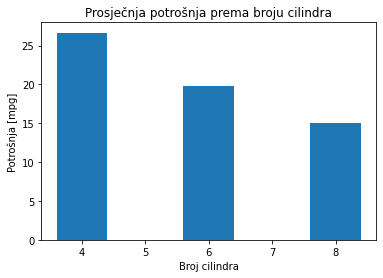

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


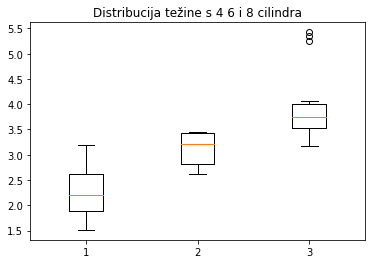

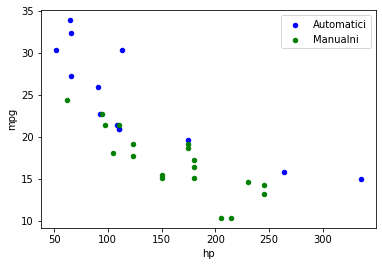

Zaključak je da automatici imaju veći MPG


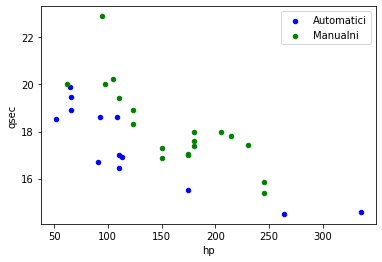

In [ ]:
#Zadatak 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

mtcars=pd.read_csv("mtcars.csv")

cilindra_4=mtcars.query("cyl == [4]")
cilindra_6=mtcars.query("cyl == [6]")
cilindra_8=mtcars.query("cyl == [8]")
x=[4,6,8]
y=[cilindra_4.mean(numeric_only=True).mpg, cilindra_6.mean(numeric_only=True).mpg, cilindra_8.mean(numeric_only=True).mpg]

plt.bar(x, y)
plt.xlabel("Broj cilindra")
plt.ylabel("Potrošnja [mpg]")
plt.title("Prosječnja potrošnja prema broju cilindra")
plt.show()

print("============================================================================================================================================")
data=[cilindra_4.wt,cilindra_6.wt,cilindra_8.wt]
plt.boxplot(data)
plt.title("Distribucija težine s 4 6 i 8 cilindra")
plt.show()

print("============================================================================================================================================")
automatici=mtcars.query("am == [0]")
manualni=mtcars.query("am == [1]")
ax=automatici.plot.scatter(x="hp", y="mpg", color="Blue", label="Automatici")
manualni.plot.scatter(x="hp", y="mpg", color="Green", label="Manualni", ax=ax)
plt.show()
print("Zaključak je da automobili sa manualnim mjenjačem imaju veći MPG")

print("============================================================================================================================================")
automatici=mtcars.query("am == [0]")
manualni=mtcars.query("am == [1]")
ax=automatici.plot.scatter(x="hp", y="qsec", color="Blue", label="Automatici")
manualni.plot.scatter(x="hp", y="qsec", color="Green", label="Manualni", ax=ax)
plt.show()



In [9]:
#Zadatak 3

import pandas as pd
from datetime import datetime
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt

url = "http://iszz.azo.hr/iskzl/rs/podatak/export/json?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017"

response = urlopen(url)
data_json = json.loads(response.read())

for item in data_json:
    item['vrijeme'] = datetime.fromtimestamp(item['vrijeme']/1000).strftime("%Y-%m-%d")
    
df = pd.DataFrame(data_json)
print("Dnevna koncentracija PM10 čestica u zraku za 2017. godinu u Osijeku:\n", df)

print("============================================================================================================================================")

greatest_PM10 = df.sort_values(by=['vrijednost'], ascending=True)
top_3_PM10_conc = greatest_PM10.head(3)
print("Dani sa najvećom vrijednošću čestica: \n", top_3_PM10_conc) 



Dnevna koncentracija PM10 čestica u zraku za 2017. godinu u Osijeku:
      vrijednost mjernaJedinica     vrijeme
0        54.542          µg/m3  2016-12-31
1        70.720          µg/m3  2017-01-01
2        29.707          µg/m3  2017-01-02
3        31.021          µg/m3  2017-01-03
4        23.034          µg/m3  2017-01-04
..          ...            ...         ...
349      38.957          µg/m3  2017-12-25
350      24.042          µg/m3  2017-12-26
351      12.057          µg/m3  2017-12-27
352       9.857          µg/m3  2017-12-28
353      25.487          µg/m3  2017-12-29

[354 rows x 3 columns]
Dani sa najvećom vrijednošću čestica: 
      vrijednost mjernaJedinica     vrijeme
295       0.765          µg/m3  2017-10-22
65        5.039          µg/m3  2017-03-06
342       5.183          µg/m3  2017-12-12
